In [95]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 1
HEADER_LINES = 2

PARTICIPANTE = 8

ATIVIDADE = 'AVD'
MARCHA = 'G'
SEQUENCIA = 1
SENSOR = 'HR'

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv')
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')


Dataset/Participante 8/V8_AVD_G_1/HR.csv
Dataset/Participante 8/V8_AVD_G_1/tags.csv
Lifesenior/AVD_G_1/V8_AVD_G_1.csv


In [96]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'hr'})
 init_time_measure = data.iloc[0,0]
 print(data)
 print(init_time_measure)

              hr
0   1.660930e+09
1   1.000000e+00
2   6.600000e+01
3   1.040000e+02
4   1.216700e+02
5   1.047500e+02
6   9.360000e+01
7   9.433000e+01
8   9.486000e+01
9   9.475000e+01
10  9.467000e+01
11  9.460000e+01
12  9.455000e+01
13  9.450000e+01
14  9.446000e+01
15  9.414000e+01
16  9.400000e+01
17  9.388000e+01
18  9.376000e+01
19  9.367000e+01
20  9.358000e+01
21  9.345000e+01
22  9.329000e+01
23  9.314000e+01
24  9.300000e+01
25  9.288000e+01
26  9.276000e+01
27  9.265000e+01
28  9.256000e+01
29  9.239000e+01
30  9.228000e+01
31  9.217000e+01
32  9.203000e+01
33  9.191000e+01
34  9.182000e+01
35  9.174000e+01
36  9.169000e+01
37  9.164000e+01
38  9.162000e+01
39  9.150000e+01
40  9.146000e+01
41  9.155000e+01
42  9.166000e+01
43  9.105000e+01
44  9.028000e+01
45  8.952000e+01
46  8.878000e+01
47  8.815000e+01
48  8.753000e+01
49  8.694000e+01
1660930145.0


In [97]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660930e+09
1  1.660930e+09
(2, 1)


In [98]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660930135.02


In [99]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
print(lines_to_cut_init)
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
if(lines_to_cut_init <= (HEADER_LINES+1)):
    lines_to_cut_init=(HEADER_LINES+1)
print(lines_to_cut_init)

-9.980000019073486
3


In [100]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
print(lines_to_cut_end)
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES+1
print(lines_to_cut_end)

39.049999952316284
42


(39, 1)
        hr
3   104.00
4   121.67
5   104.75
6    93.60
7    94.33
8    94.86
9    94.75
10   94.67
11   94.60
12   94.55
13   94.50
14   94.46
15   94.14
16   94.00
17   93.88
18   93.76
19   93.67
20   93.58
21   93.45
22   93.29
23   93.14
24   93.00
25   92.88
26   92.76
27   92.65
28   92.56
29   92.39
30   92.28
31   92.17
32   92.03
33   91.91
34   91.82
35   91.74
36   91.69
37   91.64
38   91.62
39   91.50
40   91.46
41   91.55


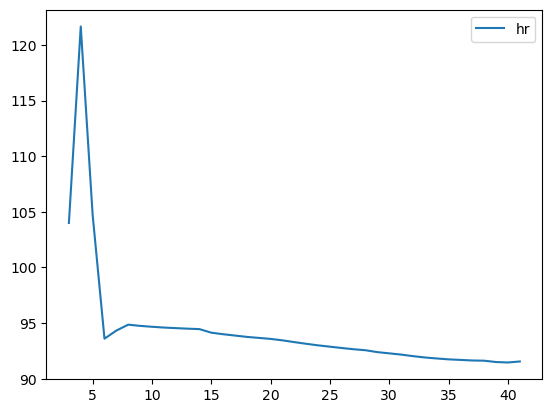

In [101]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]
print(formatted_data.shape)
formatted_data.plot()
print(formatted_data)

(1560, 1)


<Axes: >

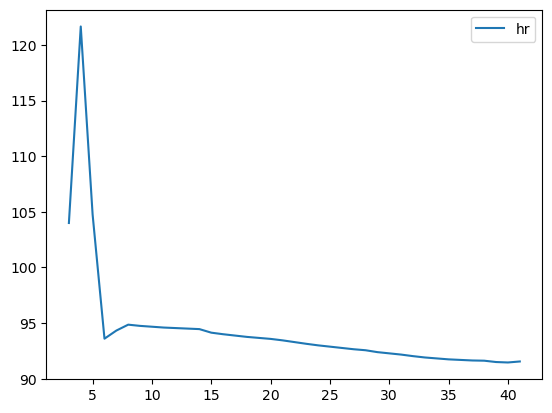

In [102]:
#upssampling from 4 to 32
formatted_data = formatted_data.loc[formatted_data.index.repeat(41)]
print(formatted_data.shape)
formatted_data.plot()

print(formatted_data.shape)

In [93]:
print(formatted_data)

        hr
3   104.00
3   104.00
3   104.00
3   104.00
3   104.00
..     ...
41   91.55
41   91.55
41   91.55
41   91.55
41   91.55

[1521 rows x 1 columns]


In [94]:
dataLifeSenior = pd.read_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv',index_col=False)

diff_rows = formatted_data.shape[0]-dataLifeSenior.shape[0]
print('diff_rows ',diff_rows)
current=0
if(diff_rows > 0 and diff_rows < 33):
    while current < diff_rows:
        #remove last row
        formatted_data = formatted_data[:-1]
        current += 1
    dataLifeSenior["hr"] = formatted_data.values
    print(dataLifeSenior)
    #export the file to specific activity
    dataLifeSenior.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)
else:
    print('There is a problem here')

FileNotFoundError: [Errno 2] No such file or directory: 'Lifesenior/AVD_G_1/V8_AVD_G_1.csv'